# Data Preprocessing and Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# First load in the training and testing data sets

# Load train data
train_data = pd.read_json("../MLFinalProject/data/train.jsonl", lines=True)

# Load test data
test_data = pd.read_json("../MLFinalProject/data/train.jsonl", lines=True)

In [3]:
# Inspect the data

# Display the first few rows of the train data
print(train_data.head())

print()

# Check for missing values in train_data
print(train_data.isna().sum())

# Check for missing values in test_data
print(test_data.isna().sum())

      id            img  label  \
0  42953  img/42953.png      0   
1  23058  img/23058.png      0   
2  13894  img/13894.png      0   
3  37408  img/37408.png      0   
4  82403  img/82403.png      0   

                                                text  
0   its their character not their color that matters  
1  don't be afraid to love again everyone is not ...  
2                           putting bows on your pet  
3  i love everything and everybody! except for sq...  
4  everybody loves chocolate chip cookies, even h...  

id       0
img      0
label    0
text     0
dtype: int64
id       0
img      0
label    0
text     0
dtype: int64


count    8500.000000
mean       11.742588
std         6.877021
min         1.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        70.000000
Name: text_length, dtype: float64


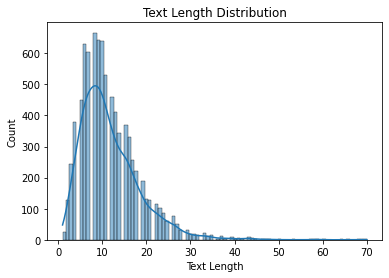

In [4]:
# Analyze distribution of text lengths

# Calculate the length of the texts
train_data['text_length'] = train_data['text'].apply(lambda x: len(x.split()))

# Compute basic statistics for text length
print(train_data['text_length'].describe())

# Visualize the distribution of text length using a histogram
sns.histplot(data=train_data, x='text_length', kde=True)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()

             text_length     label
text_length     1.000000  0.114319
label           0.114319  1.000000


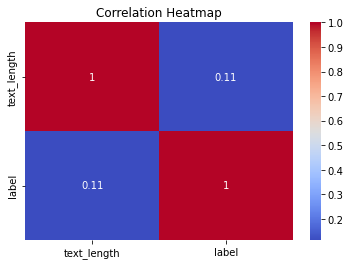

In [5]:
# Correlation analysis: text length vs label 

# Compute the correlation between text length and label
correlation = train_data[['text_length', 'label']].corr()
print(correlation)

# Visualize the correlation with a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

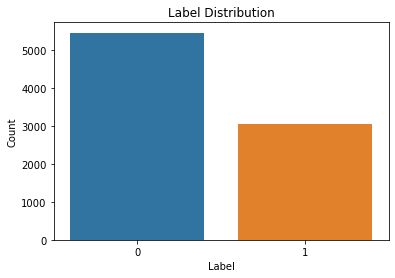

In [6]:
# Visualize the distribution of labels in the training data.
sns.countplot(x='label', data=train_data)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show() # 0 == non-hateful meme, 1 = hateful meme

Text: when you stuff your jewish chicken before you give it a good roast
Label: 0 (Non-hateful)


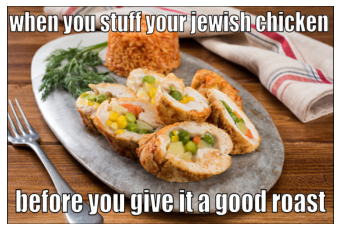

In [7]:
# display a random image and correspoding text
from PIL import Image

def display_image_with_text(index, data):
    image_path = '../MLFinalProject/data/' + data.loc[index, 'img']
    text = data.loc[index, 'text']
    label = data.loc[index, 'label']
    
    print(f"Text: {text}")
    print(f"Label: {label} (Hateful)" if label == 1 else f"Label: {label} (Non-hateful)")
    
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
# Display a random image from the dataset
random_index = train_data.sample(1).index[0]
display_image_with_text(random_index, train_data)

## Text preprocessing

In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/chris/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, digits, and punctuation marks
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Stemming or Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a string
    clean_text = ' '.join(words)
    
    return clean_text

# Apply the preprocessing function to the 'text' column of train_data and test_data
train_data['clean_text'] = train_data['text'].apply(preprocess_text)
test_data['clean_text'] = test_data['text'].apply(preprocess_text)

In [10]:
# Print first 5 rows of original and preprocessed text
for index, row in train_data.head(5).iterrows():
    print(f"Original text: {row['text']}")
    print(f"Preprocessed text: {row['clean_text']}")
    print("\n")

Original text: its their character not their color that matters
Preprocessed text: character color matter


Original text: don't be afraid to love again everyone is not like your ex
Preprocessed text: dont afraid love everyone like ex


Original text: putting bows on your pet
Preprocessed text: putting bow pet


Original text: i love everything and everybody! except for squirrels i hate squirrels
Preprocessed text: love everything everybody except squirrel hate squirrel


Original text: everybody loves chocolate chip cookies, even hitler
Preprocessed text: everybody love chocolate chip cooky even hitler




## Image Preprocessing

In [11]:
import numpy as np
import os
from PIL import Image

In [12]:
def load_and_preprocess_image(img_path, img_size=(224, 224)):
    # Load the image
    img = Image.open(img_path)
    
    # Convert the image to RGB format if it's not
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Resize the image
    img = img.resize(img_size, Image.ANTIALIAS)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Normalize pixel values (range 0-1)
    img_array = img_array / 255.0
    
    return img_array

In [13]:
train_images = []
test_images = []

# Define the path to the images folder
img_folder_path = '../MLFinalProject/data/'

for index, row in train_data.iterrows():
    img_path = os.path.join(img_folder_path, row['img'])
    train_images.append(load_and_preprocess_image(img_path))

for index, row in test_data.iterrows():
    img_path = os.path.join(img_folder_path, row['img'])
    test_images.append(load_and_preprocess_image(img_path))

train_images = np.array(train_images)
test_images = np.array(test_images)

# Feature Extraction

## Text

In [26]:
from transformers import BertTokenizer, BertModel
import torch

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_text_features(text):
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:510]  # Truncate tokens to a maximum length of 510
    tokens = ['[CLS]'] + tokens + ['[SEP]']  # Add special tokens
    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    input_ids_tensor = torch.tensor([input_ids])  # Batch size 1
    attention_mask = (input_ids_tensor != tokenizer.pad_token_id).float()

    with torch.no_grad():
        embeddings = model(input_ids_tensor, attention_mask=attention_mask)[0][:, 0, :].numpy()

    return embeddings

train_data['text_features'] = train_data['clean_text'].apply(extract_text_features)

# Print the first few rows of the DataFrame to check the results
print(train_data.head())

      id            img  label  \
0  42953  img/42953.png      0   
1  23058  img/23058.png      0   
2  13894  img/13894.png      0   
3  37408  img/37408.png      0   
4  82403  img/82403.png      0   

                                                text  text_length  \
0   its their character not their color that matters            8   
1  don't be afraid to love again everyone is not ...           12   
2                           putting bows on your pet            5   
3  i love everything and everybody! except for sq...           11   
4  everybody loves chocolate chip cookies, even h...            7   

                                          clean_text  \
0                             character color matter   
1                  dont afraid love everyone like ex   
2                                    putting bow pet   
3  love everything everybody except squirrel hate...   
4    everybody love chocolate chip cooky even hitler   

                                       text

## Image

In [25]:
import tensorflow as tf

# Load the pre-trained ResNet-50 model (without the top classification layer)
base_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    pooling='avg',
    weights='imagenet'
)

# Set the model to non-trainable (we're only using it for feature extraction)
base_model.trainable = False

# Extract features (embeddings) using the ResNet-50 model
image_embeddings = base_model.predict(train_images)

94773248/94765736 [==============================] - 2s 0us/step


## Combine the extracted features

In [27]:
import numpy as np

# Convert the 'text_features' column to a NumPy array
text_features_array = np.vstack(train_data['text_features'].values)

# Ensure that both text_features_array and image_embeddings have the same number of rows
assert text_features_array.shape[0] == image_embeddings.shape[0]

# Concatenate text and image features along axis 1 (columns)
combined_features = np.concatenate([text_features_array, image_embeddings], axis=1)

# Print the shape of the combined features array
print(combined_features.shape)

(8500, 2816)


# Building Models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, train_data['label'], test_size=0.2, random_state=42)

# Create a logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6847058823529412
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1075
           1       0.60      0.44      0.51       625

    accuracy                           0.68      1700
   macro avg       0.66      0.63      0.64      1700
weighted avg       0.67      0.68      0.67      1700



/Users/chris/opt/anaconda3/envs/assignment1.0/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
